In [1]:
# from nibabel.testing import data_path
import numpy as np
import os
import nibabel as nib
import cv2
import math

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def read_mri_image(filename):
    img = nib.load(filename)
    return img.get_data()

In [3]:
path = './data'

def prepare_data(path):
    images = []
    labels = []

    for folder1 in os.listdir(path):
        folder1_ = os.path.join(path, folder1)
        if os.path.isdir(folder1_):
            for folder2 in os.listdir(folder1_):
                folder2_ = os.path.join(folder1_, folder2)     
                if os.path.isdir(folder2_):
                    for f in os.listdir(folder2_):
                        if os.path.isdir(folder2_):
                            f_ = os.path.join(folder2_, f)
                            print(f_)      
                            if f_.endswith('z'):
                                images.append(read_mri_image(f_))
                                
                                if 'anat' in folder2_:
                                    labels.append(0)
                                else:
                                    labels.append(1)

        # labels  = tf.keras.utils.to_categorical(labels, num_classes)
    return images, labels
#     return np.array(images,dtype=np.float32), np.array(labels)

image_set = []
label_set = []

def load_data(path):
    if path.endswith('nii.gz'):
        image_set.append(read_mri_image(path)) 
        if len(image_set)%10==0:
            print(len(image_set))
        if 'anat' in path:
            label_set.append(0)
        else:
            label_set.append(1)
    elif os.path.isdir(path):
        for file in os.listdir(path):
            load_data(os.path.join(path,file))


In [4]:
# images, labels = prepare_data(path)
load_data(path)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


In [6]:
old_images = np.array(image_set)
labels = np.array(label_set)
image_shapes = np.array([i.shape for i in old_images])
print(np.unique(image_shapes))


[(64, 64, 32, 130) (64, 64, 32, 132) (64, 64, 32, 133) (64, 64, 32, 184)
 (64, 64, 32, 240) (64, 64, 32, 360) (64, 64, 32, 480) (64, 64, 32, 724)
 (256, 256, 176) (256, 256, 256)]


In [ ]:
for i in old_images:
    print(i.shape)

In [8]:
images = []
for i in range(len(old_images)):
    new_i = old_images[i]
    if len(old_images[i].shape) == 4:
        new_i = np.mean(new_i,axis=3)
    new_i = np.mean(new_i,axis=2)
    images.append(new_i)

In [45]:
print(len(images))
for i in range(len(images)):
    images[i] = cv2.resize(images[i],(32,32))
    print(images[i].shape)


323
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 3

In [46]:
print(labels.shape)

(323,)


In [47]:
import keras
x = np.array(images) / 255.
y = keras.utils.to_categorical(labels,num_classes=2)

In [48]:
print(x.shape, y.shape)

(323, 32, 32) (323, 2)


0


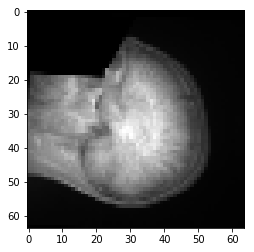

1


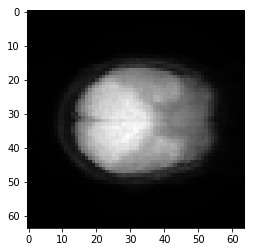

1


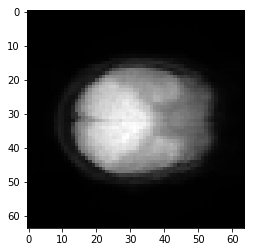

0


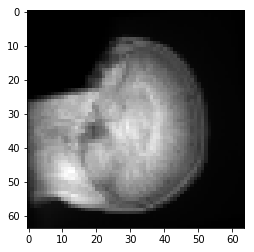

1


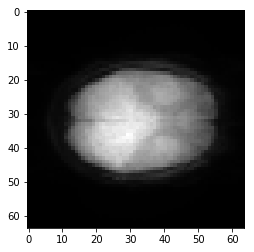

1


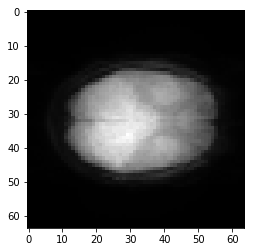

0


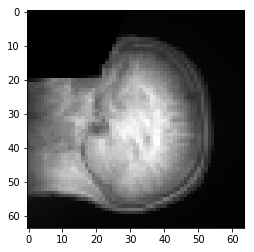

1


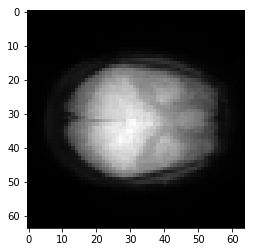

1


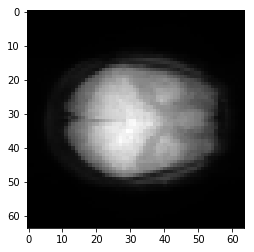

0


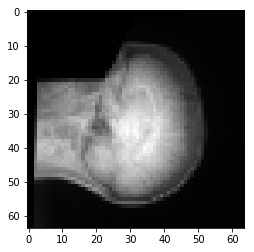

1


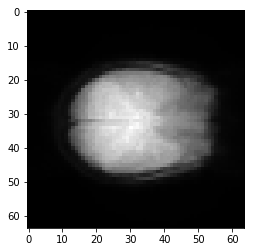

0


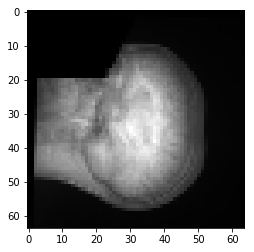

1


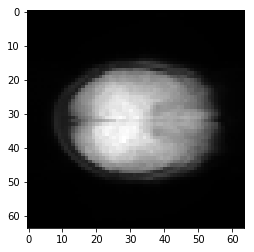

1


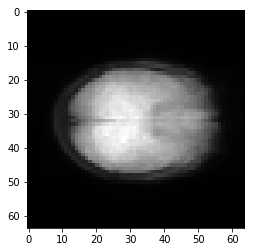

0


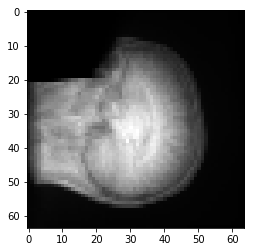

1


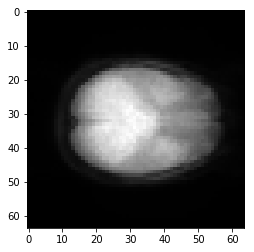

1


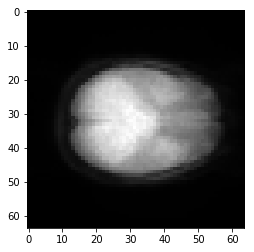

0


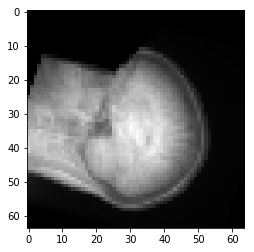

1


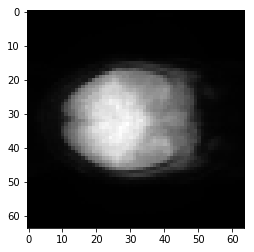

0


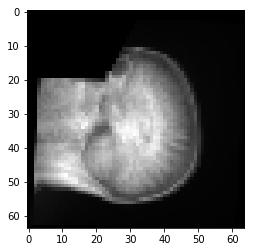

1


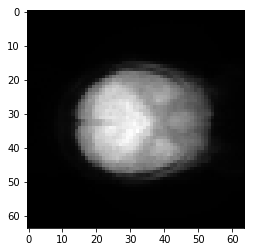

1


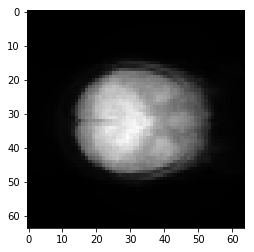

0


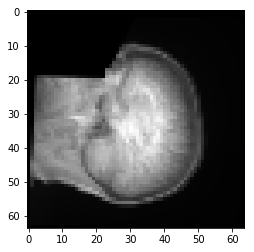

1


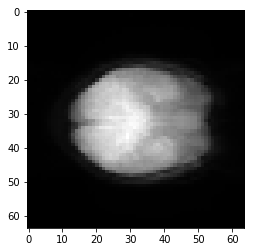

1


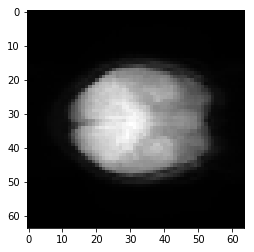

0


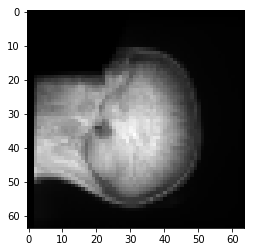

1


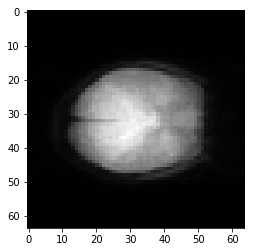

0


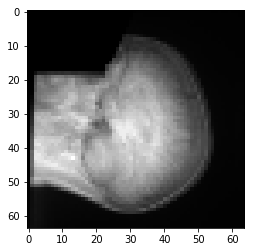

1


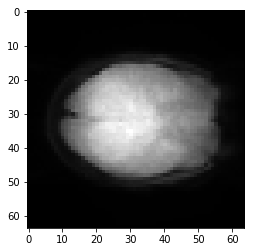

0


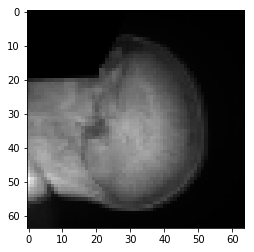

1


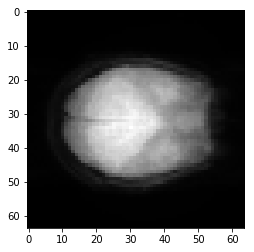

0


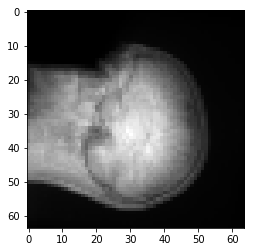

1


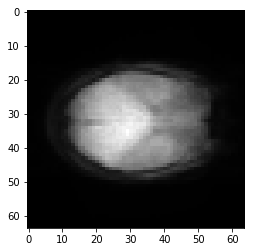

0


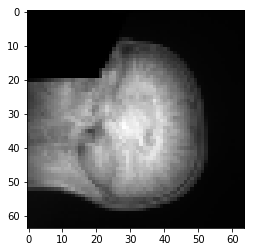

1


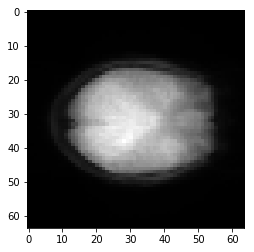

1


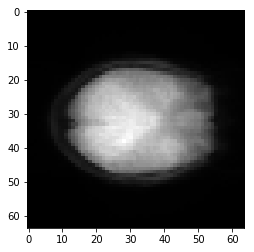

0


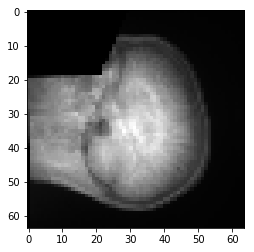

1


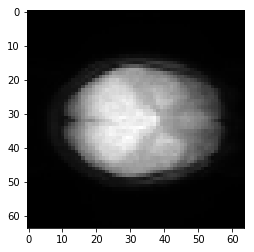

1


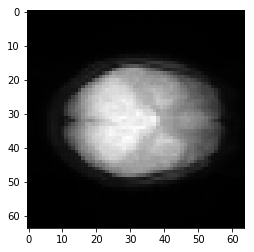

0


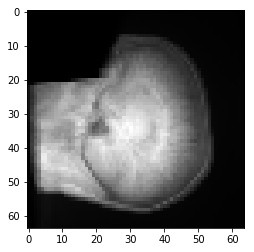

1


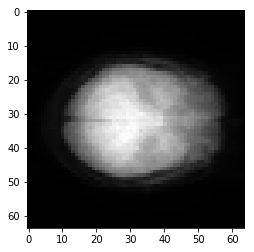

0


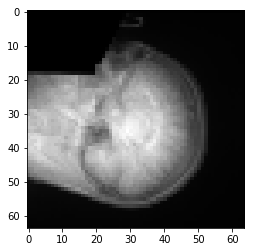

1


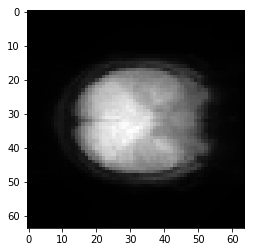

1


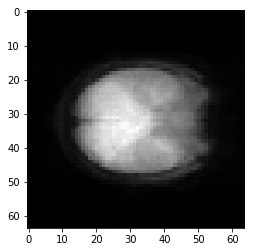

0


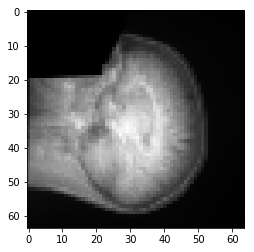

1


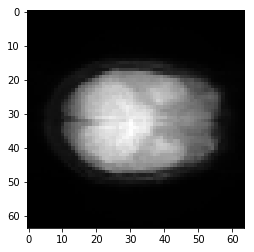

1


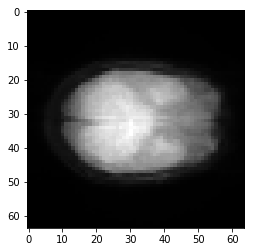

0


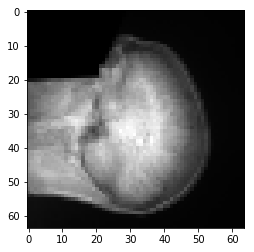

1


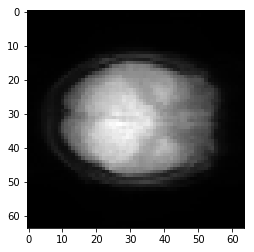

1


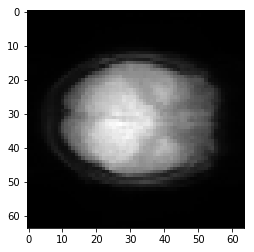

0


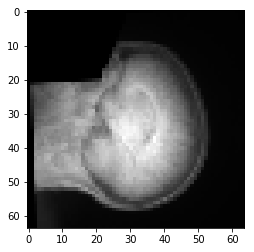

1


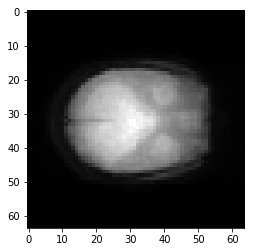

0


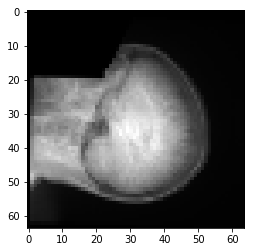

1


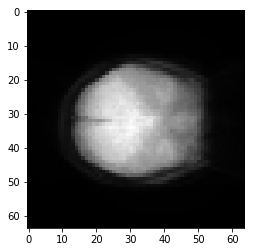

0


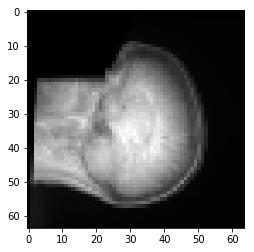

1


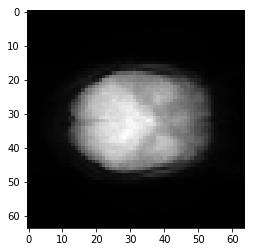

0


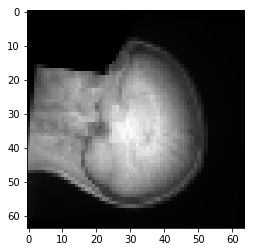

1


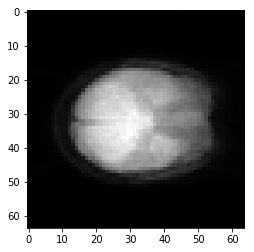

0


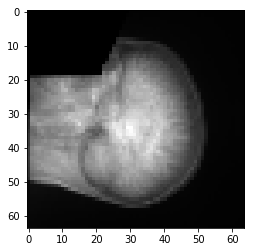

1


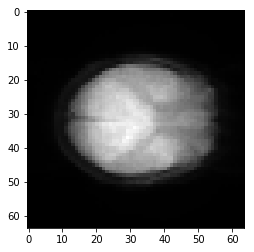

1


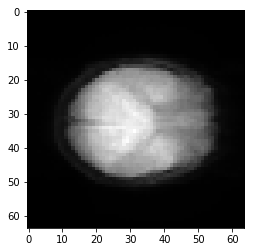

0


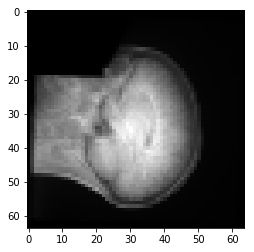

1


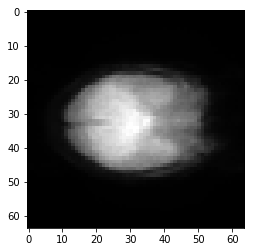

0


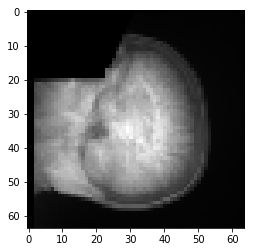

1


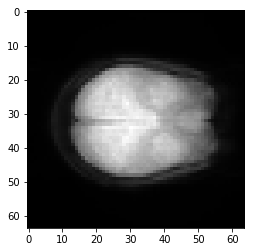

1


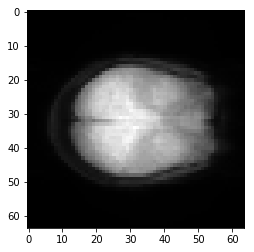

0


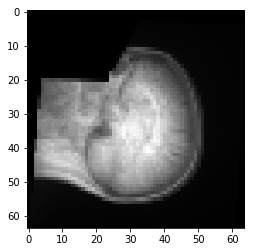

1


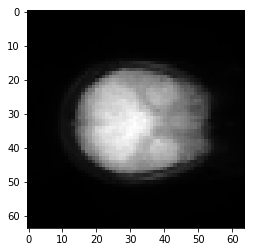

1


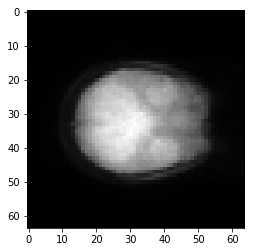

0


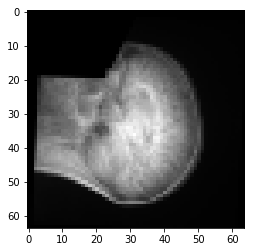

1


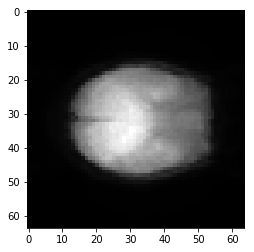

1


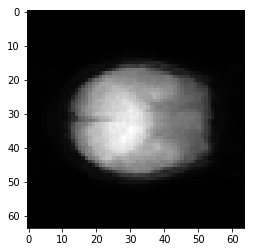

0


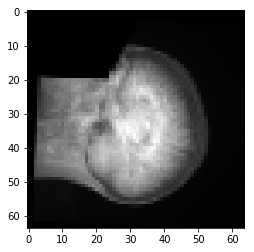

1


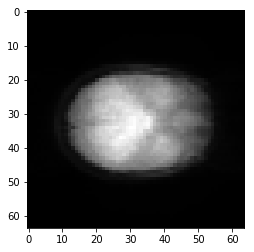

1


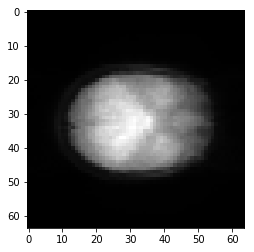

0


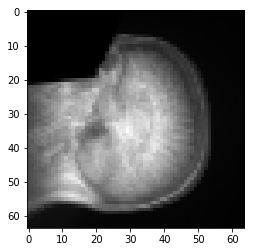

1


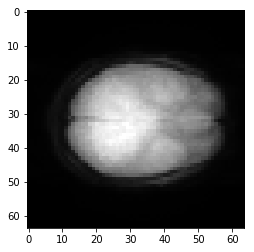

1


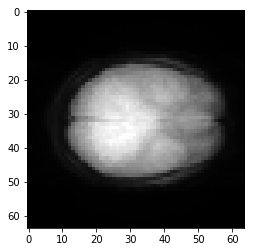

0


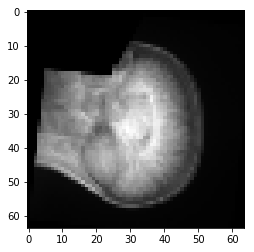

1


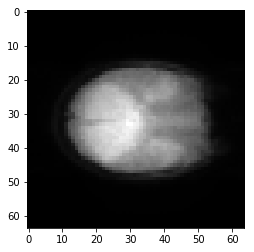

1


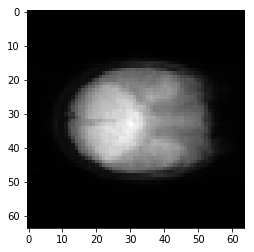

0


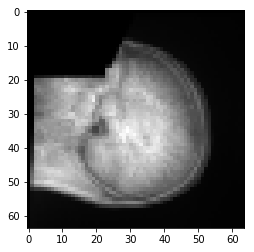

1


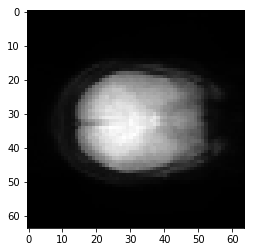

1


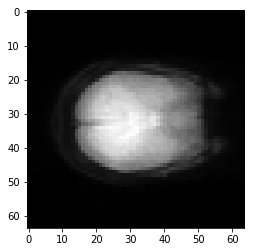

0


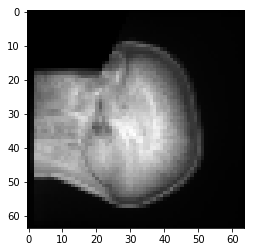

1


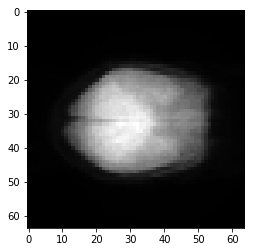

1


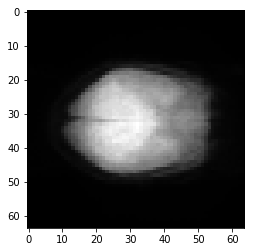

0


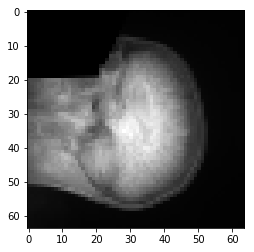

1


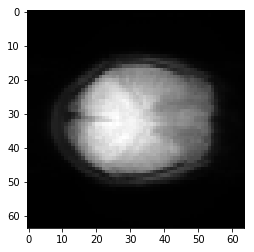

1


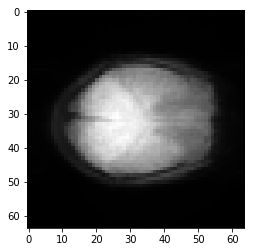

0


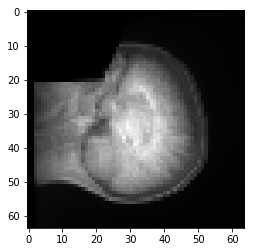

1


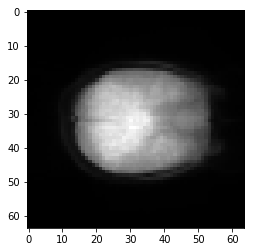

1


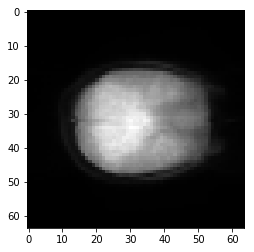

0


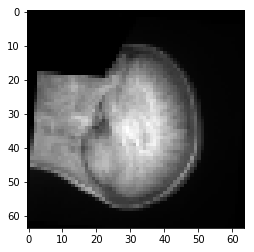

1


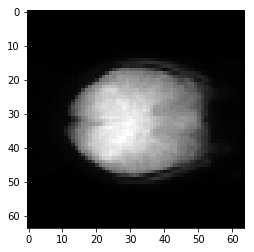

1


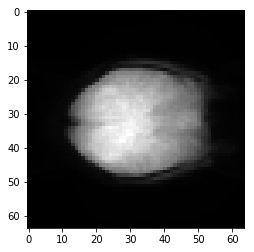

0


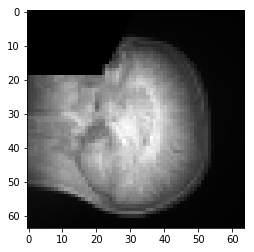

1


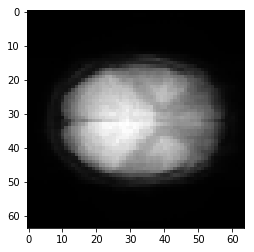

1


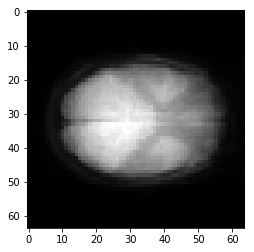

0


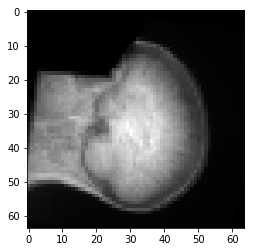

1


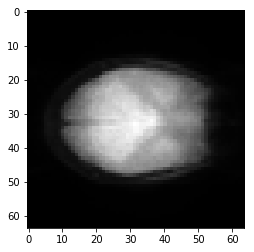

1


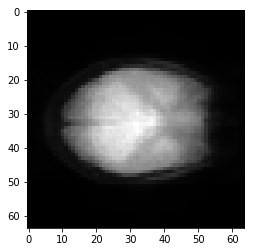

0


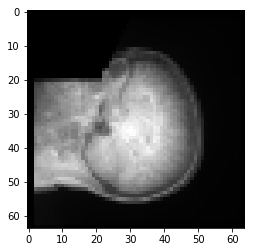

1


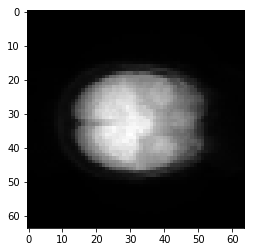

1


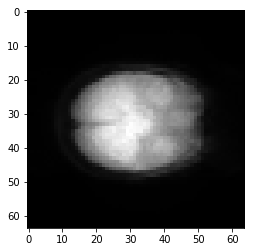

0


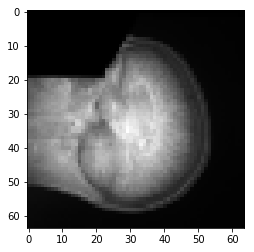

1


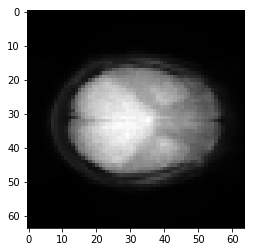

1


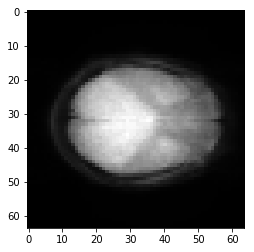

0


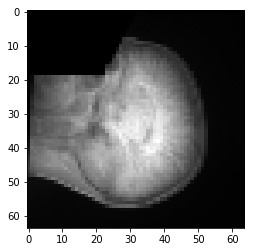

1


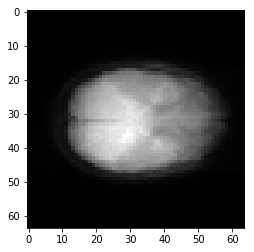

1


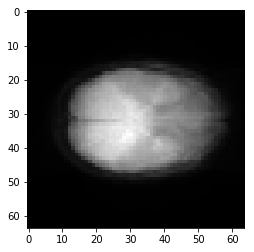

0


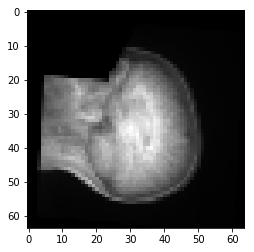

1


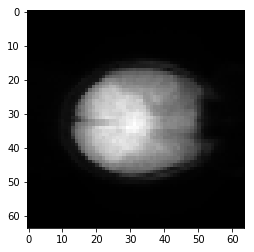

1


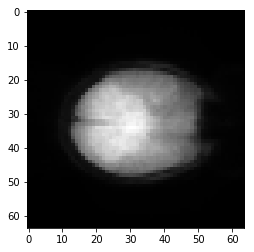

0


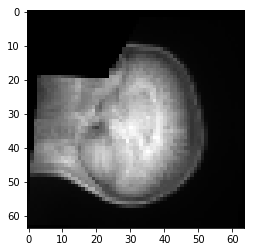

1


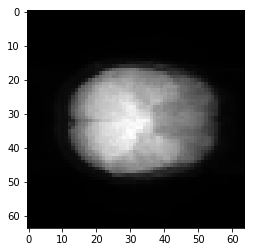

1


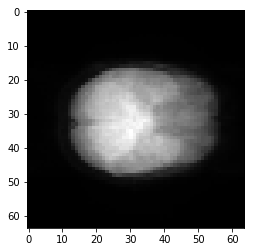

0


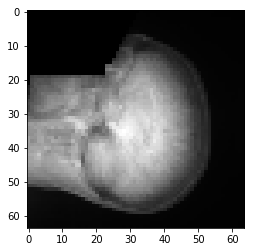

1


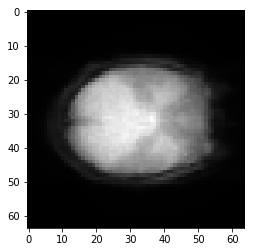

0


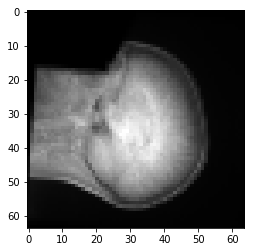

1


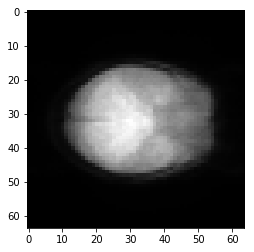

0


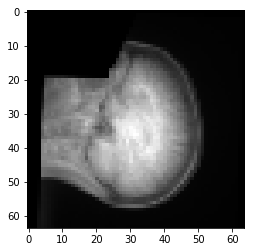

1


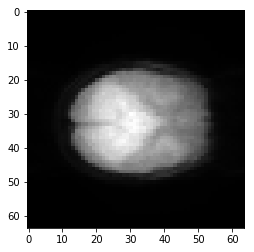

0


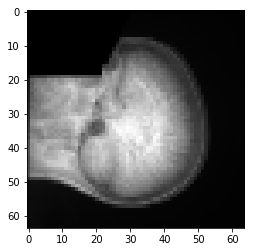

1


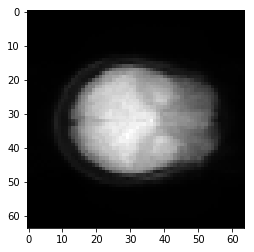

1


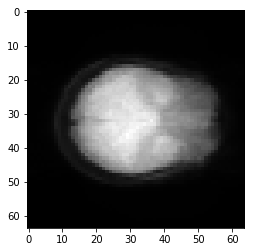

0


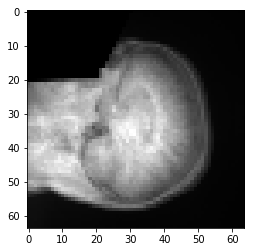

1


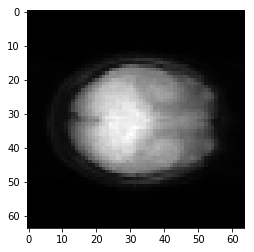

1


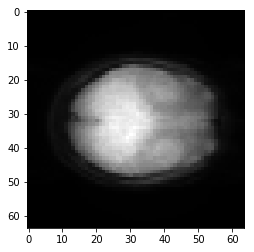

0


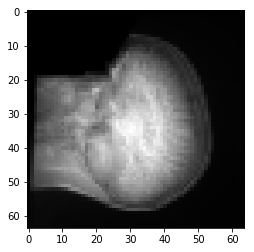

1


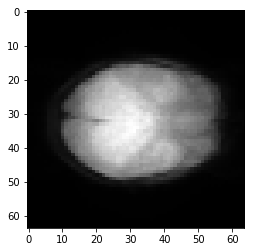

1


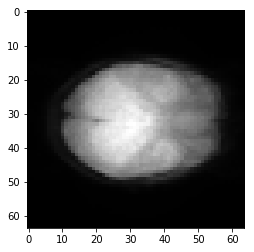

0


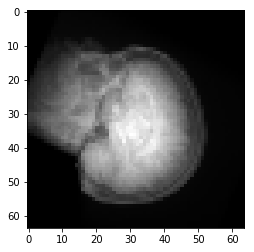

1


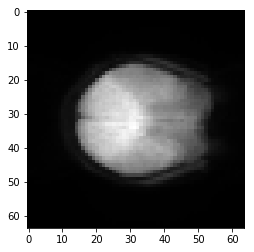

1


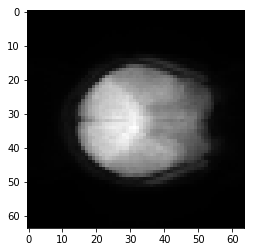

0


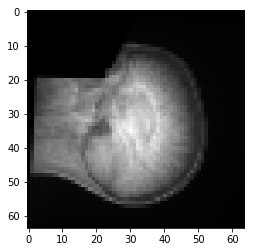

1


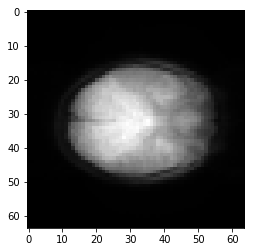

1


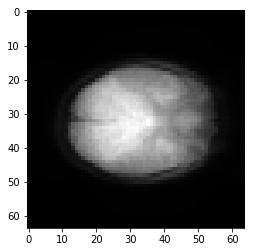

0


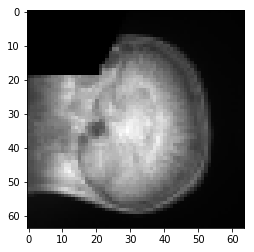

1


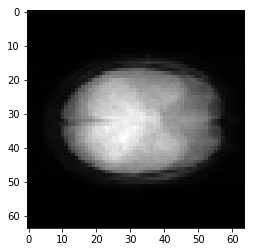

1


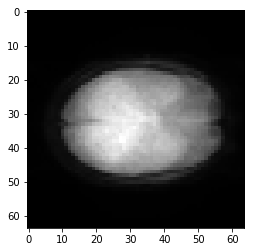

0


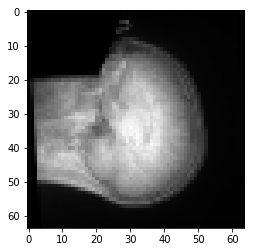

1


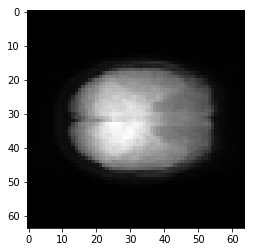

1


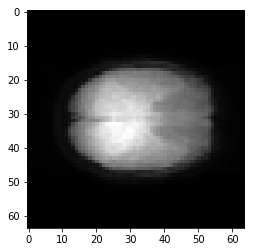

0


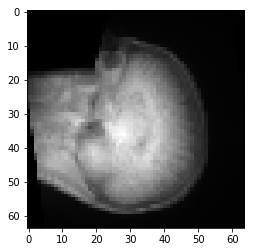

1


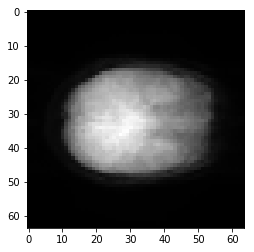

1


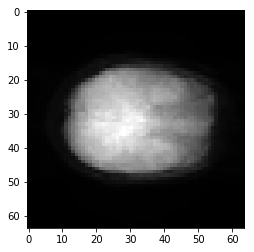

0


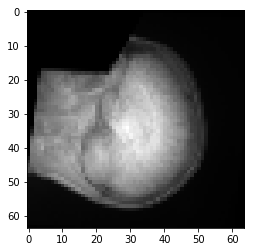

1


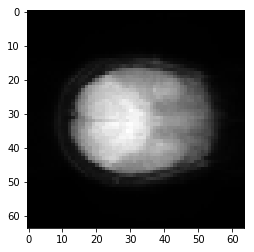

1


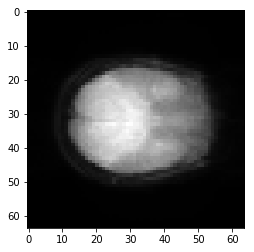

0


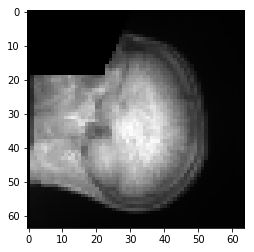

1


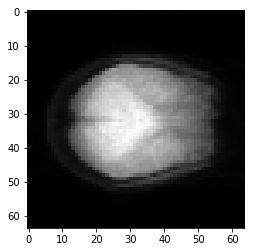

1


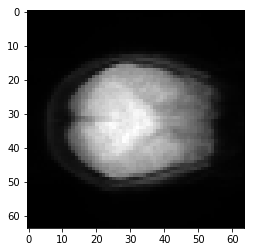

0


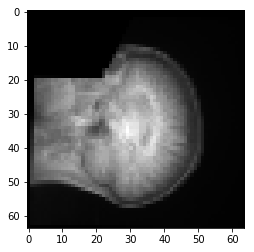

1


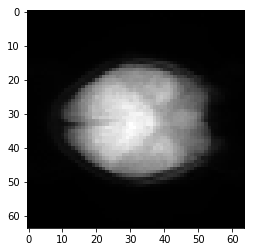

1


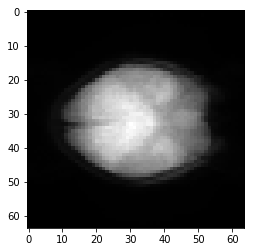

0


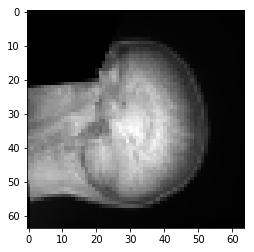

1


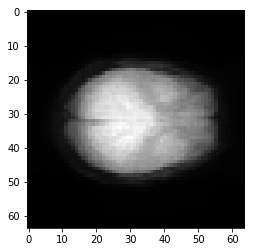

1


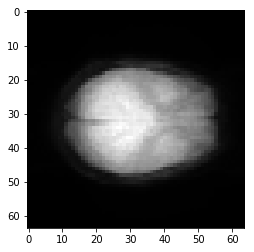

0


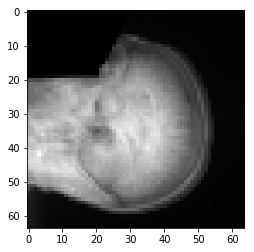

1


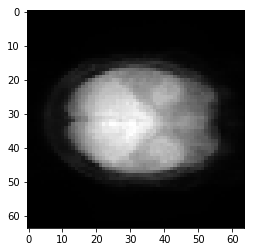

0


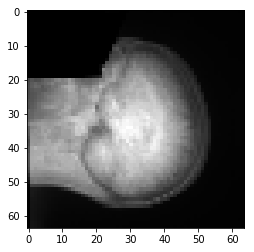

1


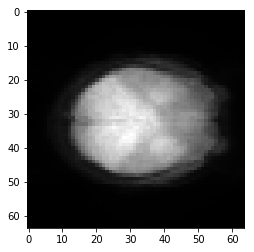

0


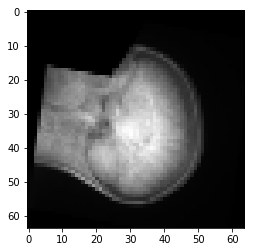

1


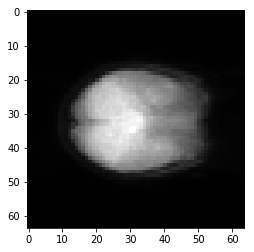

0


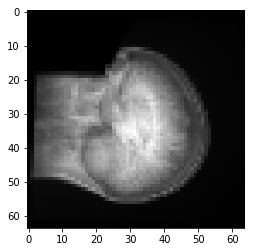

1


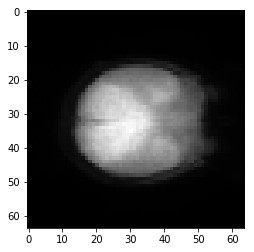

1


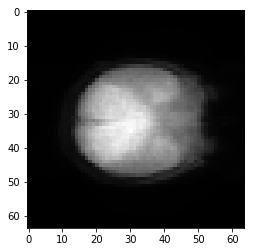

0


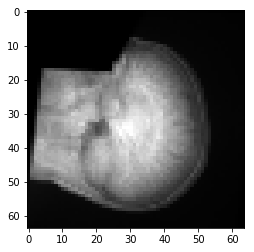

1


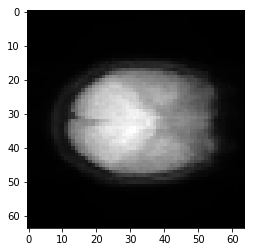

1


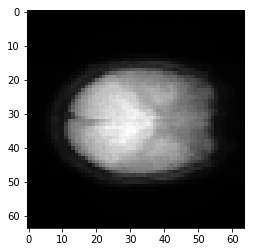

0


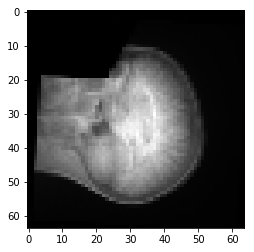

1


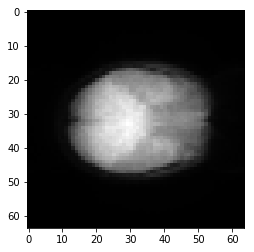

1


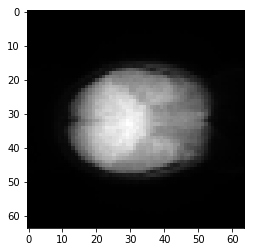

0


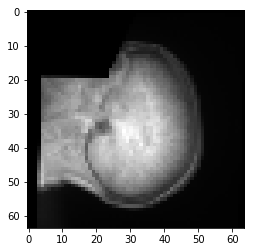

1


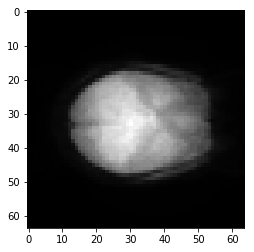

0


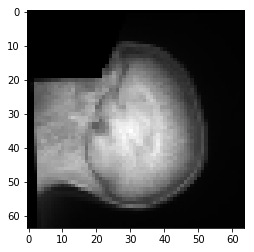

1


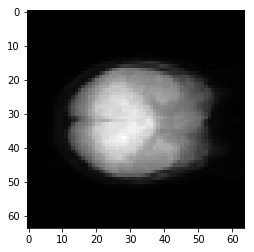

0


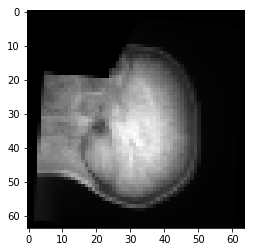

1


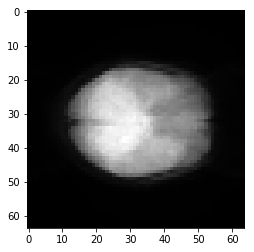

0


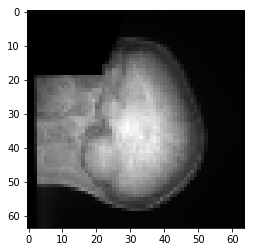

1


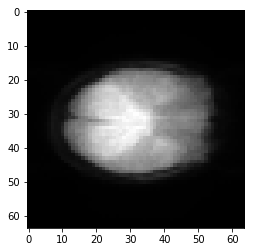

0


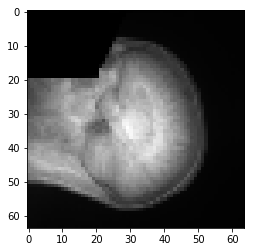

1


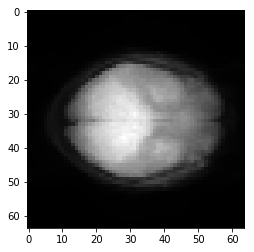

1


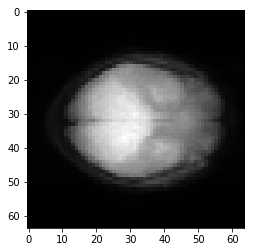

0


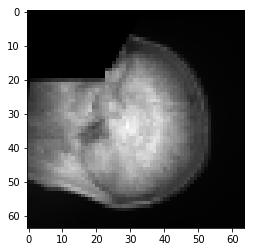

1


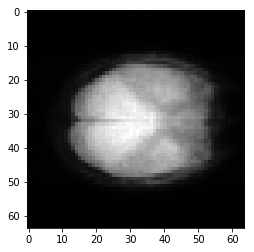

1


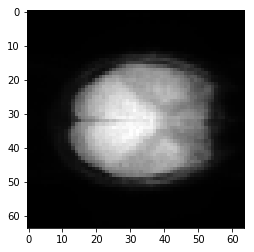

0


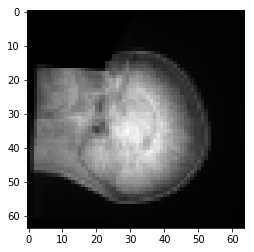

1


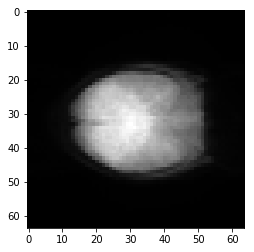

0


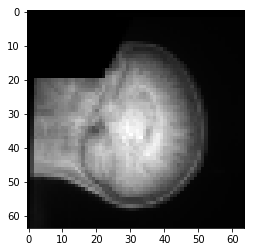

1


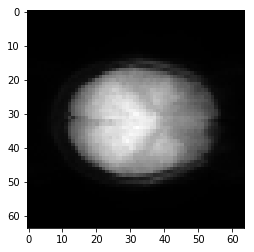

0


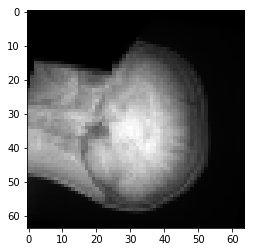

1


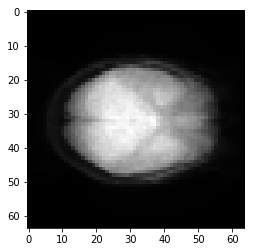

0


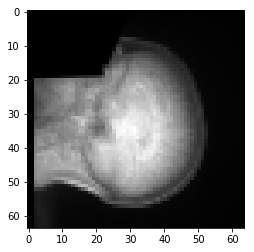

1


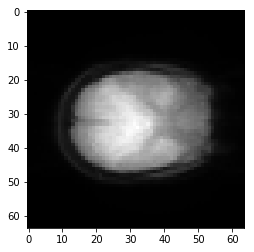

0


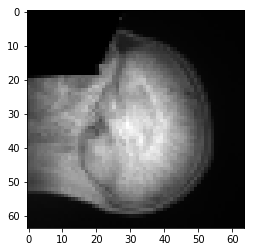

1


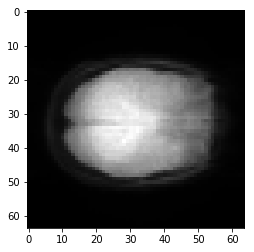

1


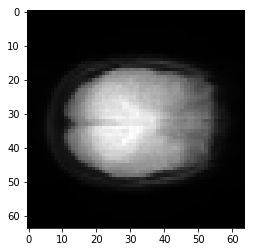

0


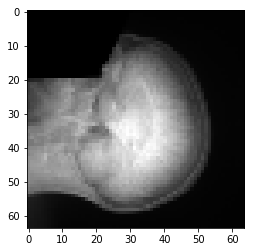

1


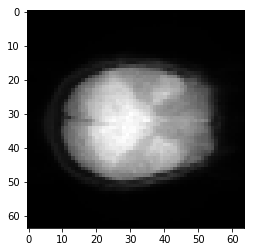

0


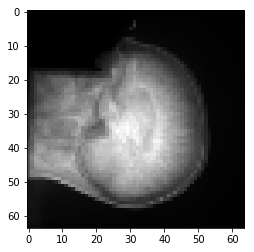

1


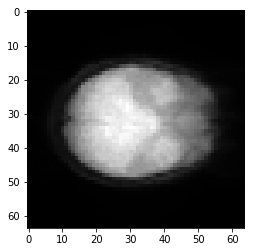

0


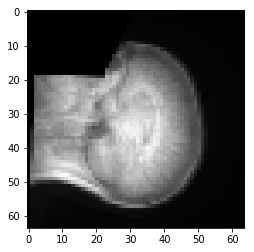

1


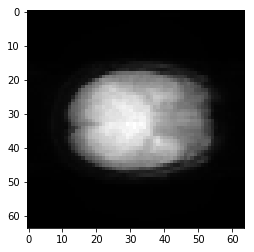

1


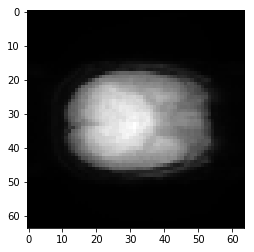

0


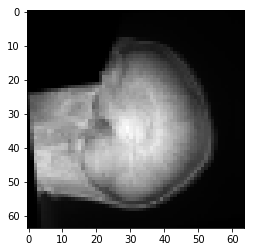

1


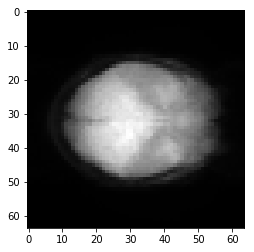

0


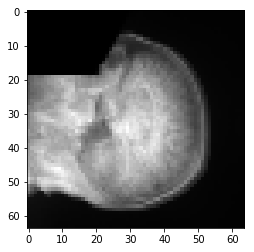

1


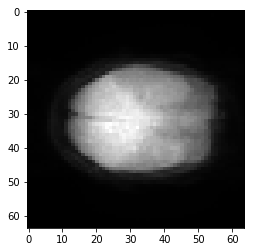

1


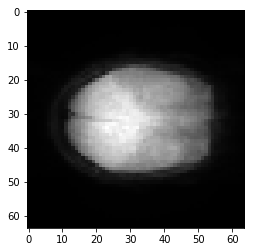

0


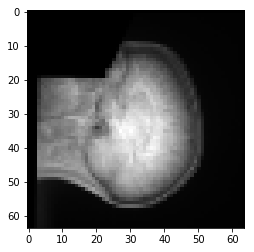

1


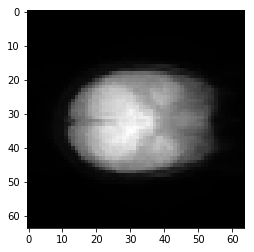

0


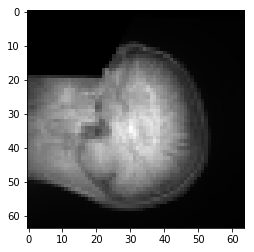

1


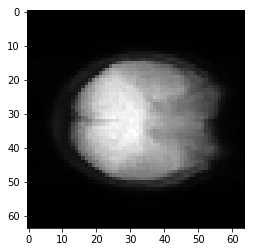

1


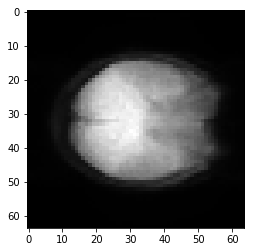

0


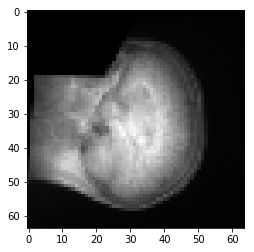

1


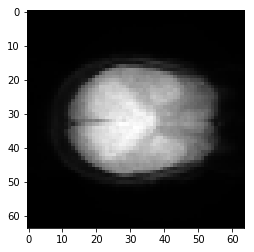

1


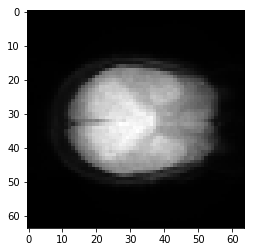

0


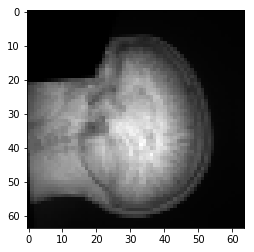

1


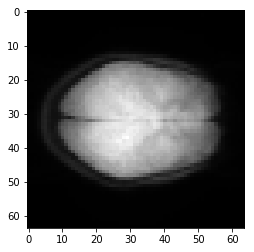

1


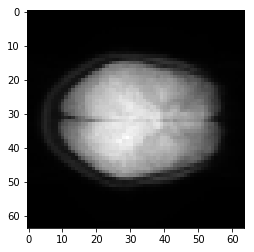

0


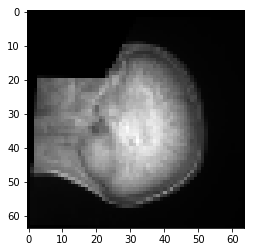

1


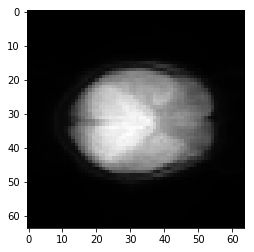

1


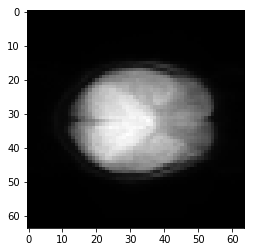

0


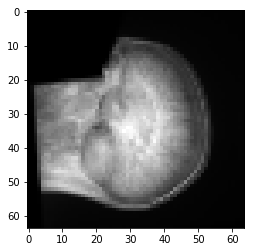

1


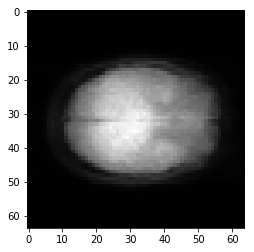

1


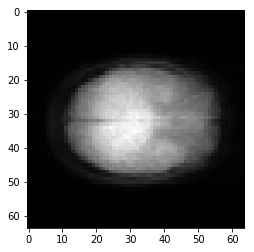

0


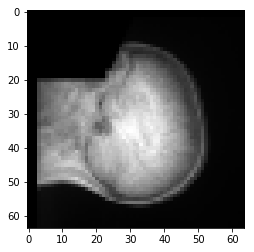

1


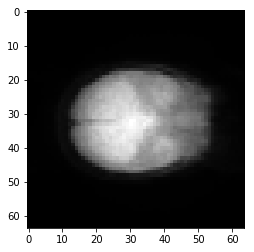

1


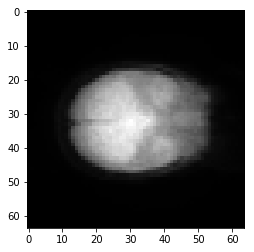

0


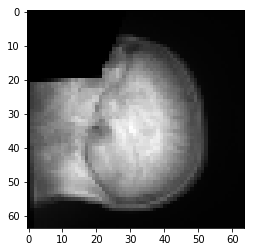

1


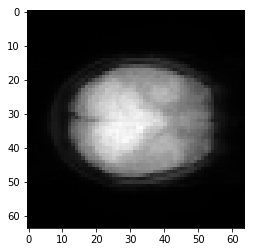

1


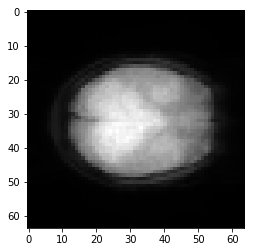

0


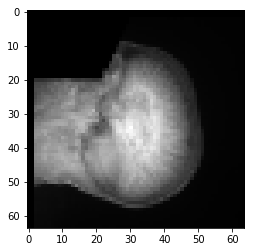

1


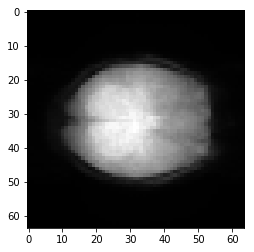

1


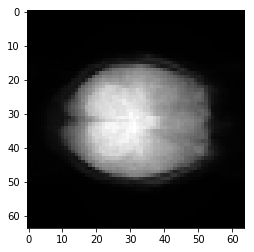

0


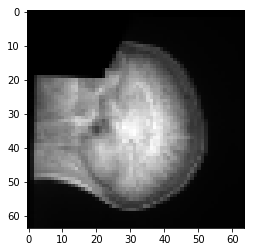

1


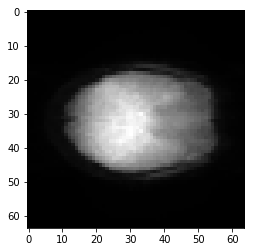

1


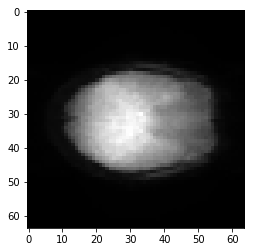

0


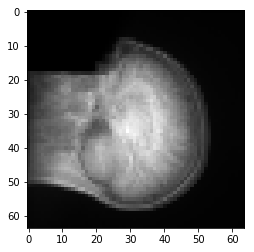

1


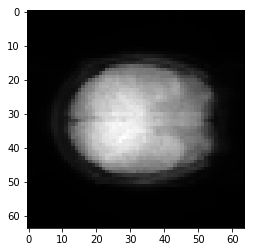

1


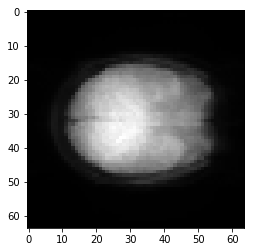

0


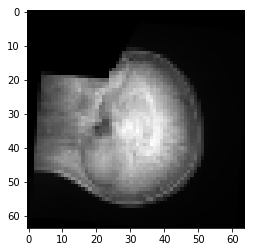

1


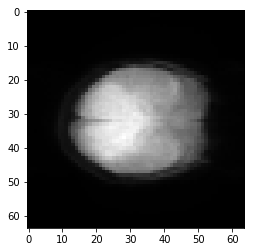

1


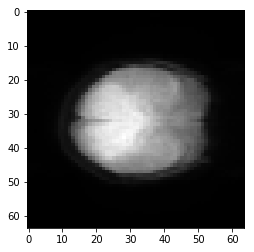

0


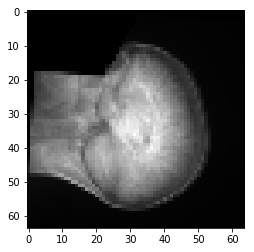

1


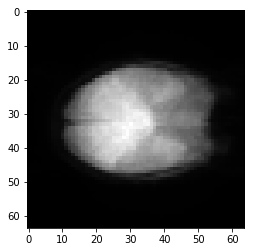

1


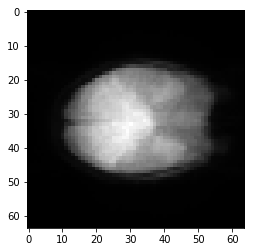

0


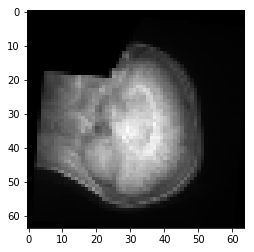

1


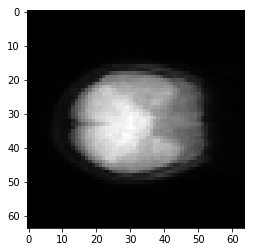

1


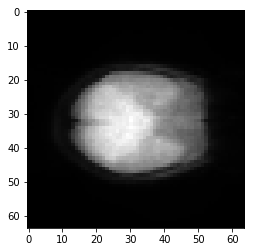

0


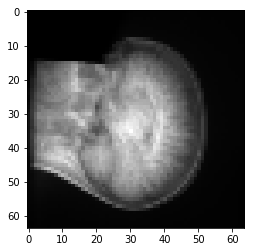

1


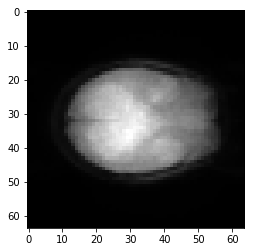

1


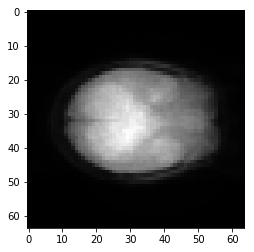

0


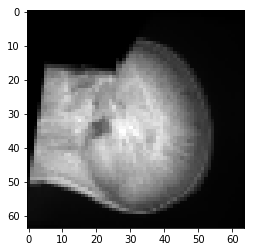

1


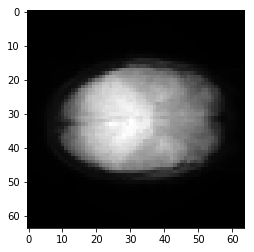

1


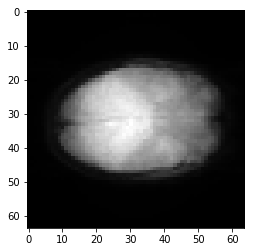

0


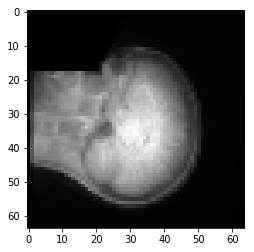

1


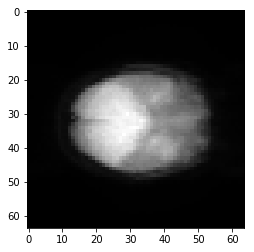

0


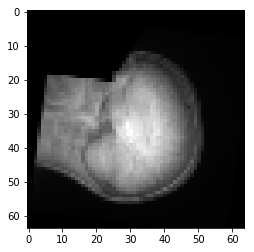

1


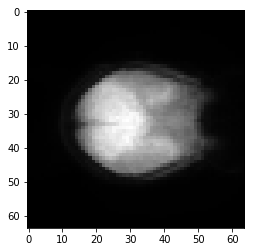

0


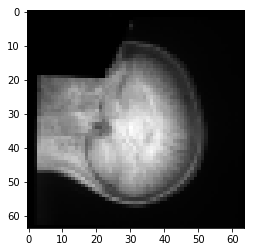

1


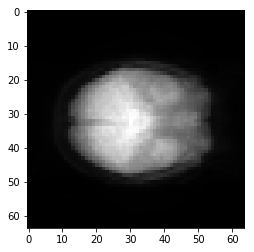

0


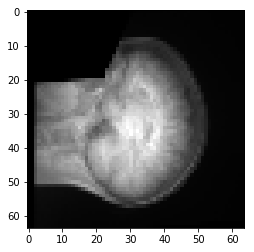

1


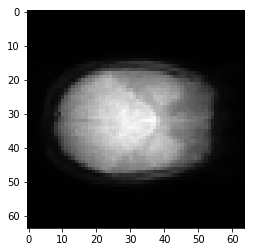

1


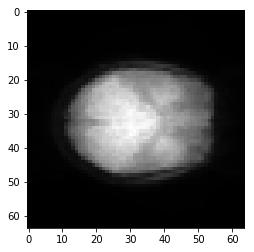

0


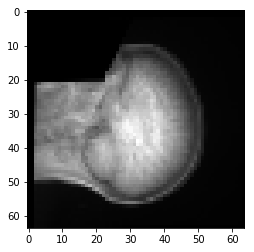

1


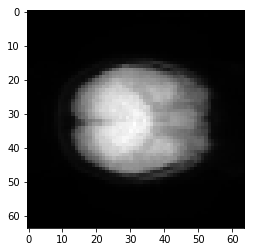

1


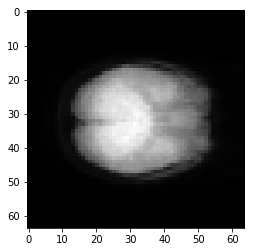

0


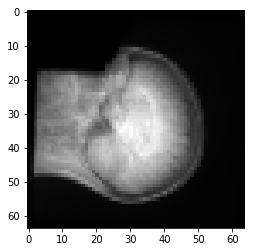

1


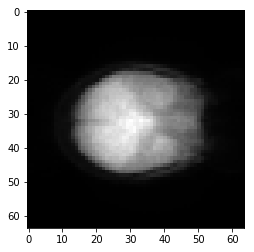

1


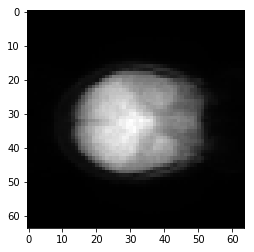

0


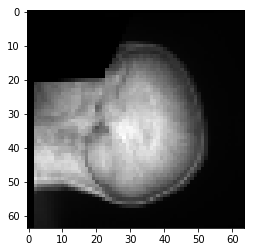

1


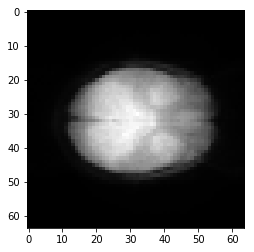

0


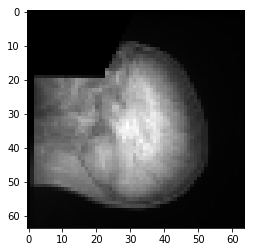

1


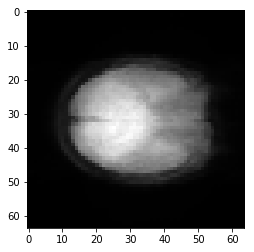

1


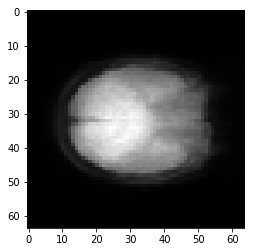

0


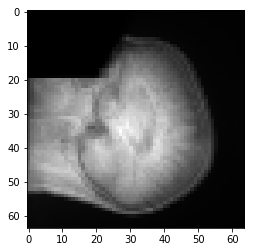

1


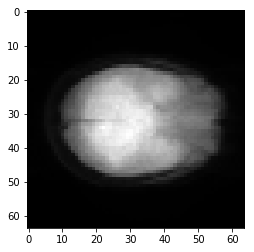

1


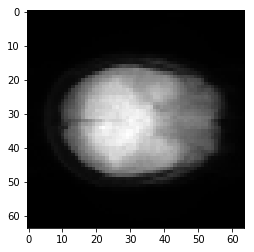

0


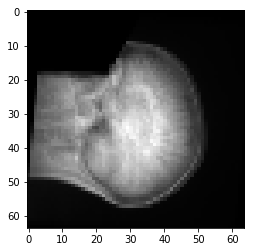

1


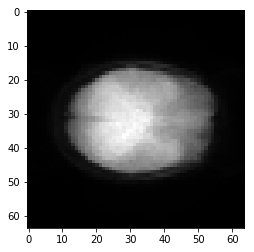

1


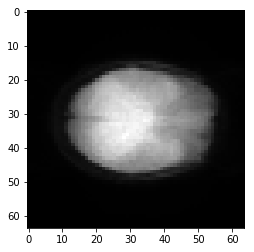

0


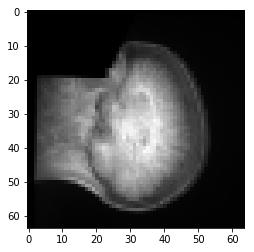

1


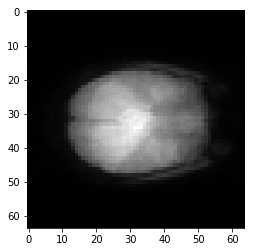

1


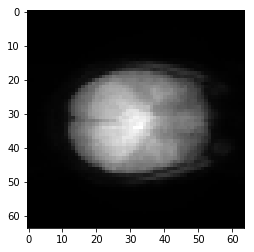

0


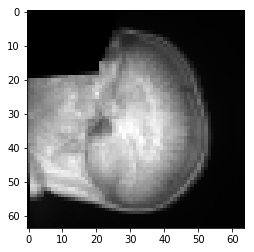

1


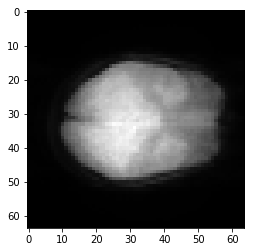

1


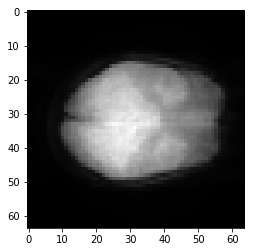

0


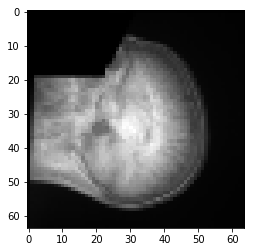

1


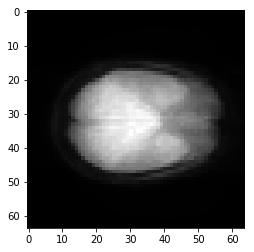

1


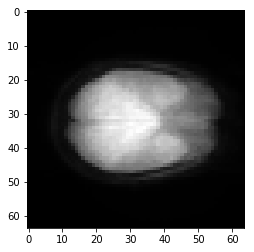

0


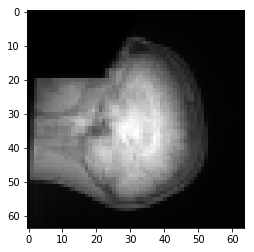

1


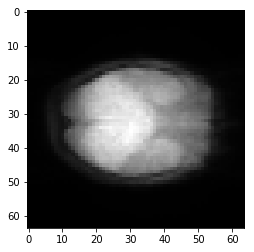

0


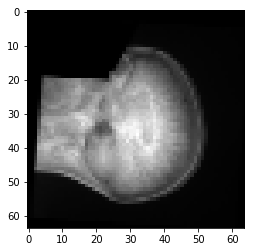

1


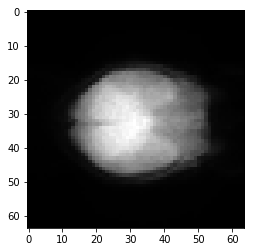

1


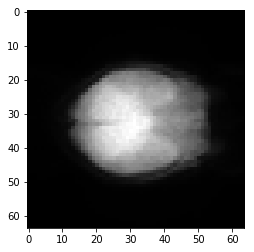

0


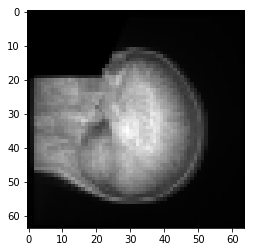

1


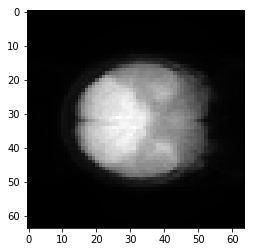

1


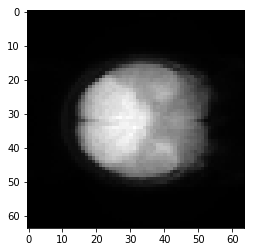

0


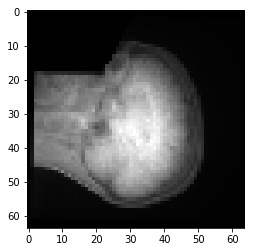

1


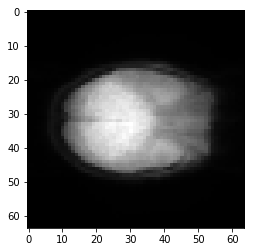

0


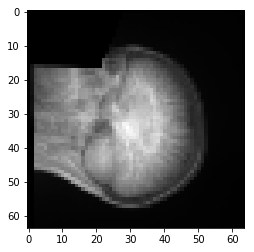

1


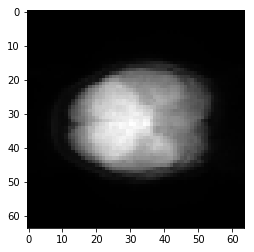

1


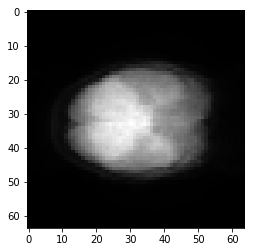

0


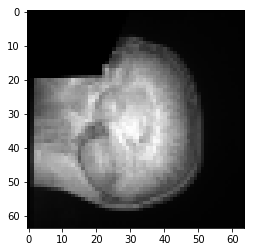

1


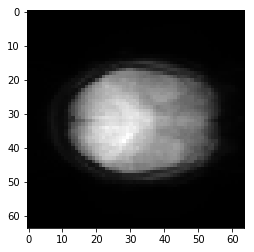

1


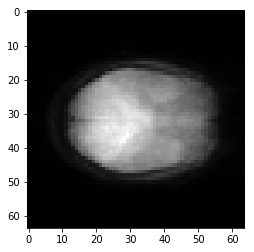

0


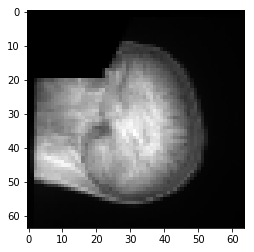

1


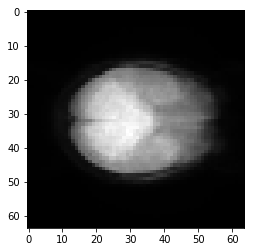

1


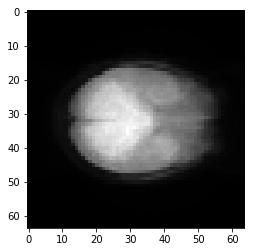

0


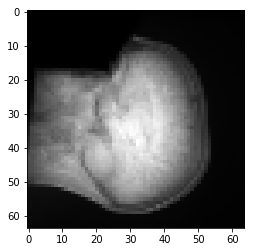

1


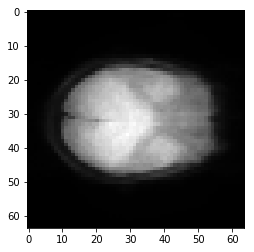

1


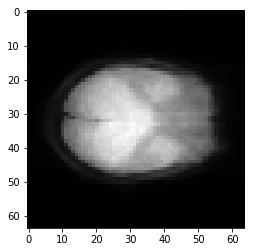

0


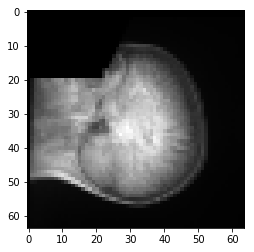

1


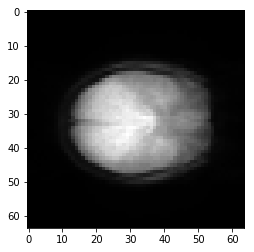

1


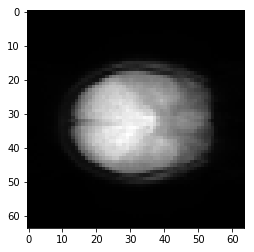

0


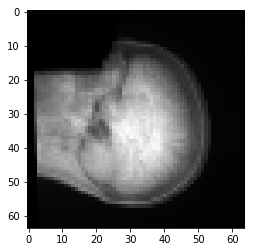

1


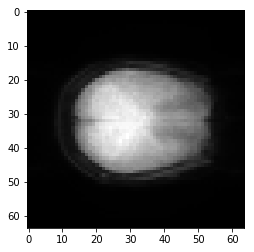

0


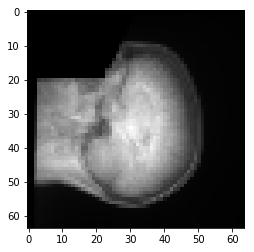

1


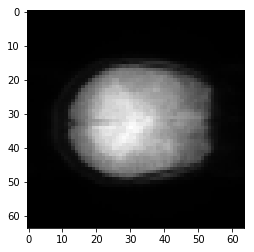

1


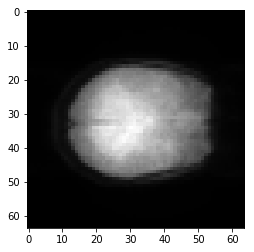

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 
for e,i in enumerate(x):
    print (labels[e])
    plt.imshow(i,'gray')
    plt.show()

In [50]:
print(x[10].shape)
x = np.reshape(x,(-1,32,32,1))

(32, 32)


In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32,3,input_shape=(32,32,1),activation='relu'))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [65]:
model.fit(x,y,epochs=10,validation_split=0.2,batch_size=16)

Train on 258 samples, validate on 65 samples
Epoch 1/10
258/258 [==============================] - 2s 6ms/step - loss: 0.2239 - acc: 0.8682 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 2/10
258/258 [==============================] - 1s 3ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 3.7396e-06 - val_acc: 1.0000
Epoch 3/10
258/258 [==============================] - 1s 3ms/step - loss: 3.8711e-04 - acc: 1.0000 - val_loss: 3.9954e-06 - val_acc: 1.0000
Epoch 4/10
258/258 [==============================] - 1s 2ms/step - loss: 4.2617e-04 - acc: 1.0000 - val_loss: 1.3746e-06 - val_acc: 1.0000
Epoch 5/10
258/258 [==============================] - 1s 2ms/step - loss: 5.4709e-04 - acc: 1.0000 - val_loss: 6.3548e-07 - val_acc: 1.0000
Epoch 6/10
258/258 [==============================] - 1s 3ms/step - loss: 7.3269e-05 - acc: 1.0000 - val_loss: 1.0105e-06 - val_acc: 1.0000
Epoch 7/10
258/258 [==============================] - 1s 3ms/step - loss: 7.6147e-04 - acc: 1.0000 - val_loss: 5.0802e-07 - val